# TSF GRIP Nov 2020 
## Task #1 (Prediction using Supervised ML) by Tanushree Roy
### To predict a student's percentage according to the study hours per day

In [1]:
#Importing all important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
#import the data from given URL
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
#Showing Top 5 rows of the dataset to get an idea about the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


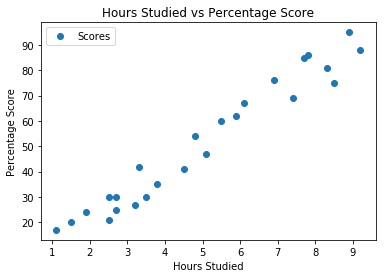

In [4]:
#Plot the data
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [5]:
#Defining the dataset into Attribute and Label
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print("x:\n",x)
print("y:\n",y)

x:
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y:
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting the Dataset into traing and testing data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=42)

### Model Building

In [19]:
#Building the model by using LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
predict_y=LR.predict(x_train)

In [20]:
#Fitting of tesing Data
LR.fit(x_test, y_test)
pred_test_y = LR.predict(x_test)

#### Based on this model prediction will be done

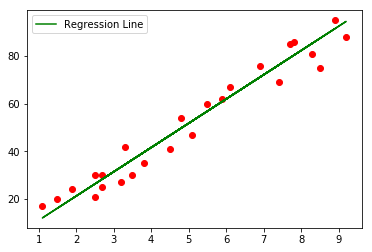

In [33]:
#Plotting the regression line and Original Data
line = LR.coef_*x+LR.intercept_
plt.scatter(x,y,color='red')
plt.plot(x,line, color='green', label='Regression Line')
plt.legend()
plt.show()

### From the graph above, it is clearly visible that there is a positive linear relation between the number of hours studied and  the percentage of score.

In [22]:
#Prediction according to Testing Data
data= pd.DataFrame({'Actual': y_test,'Predicted': pred_test_y})
data

,Actual,Predicted
0,81,85.349681
1,30,26.314568
2,21,26.314568
3,76,71.099826
4,62,60.921358


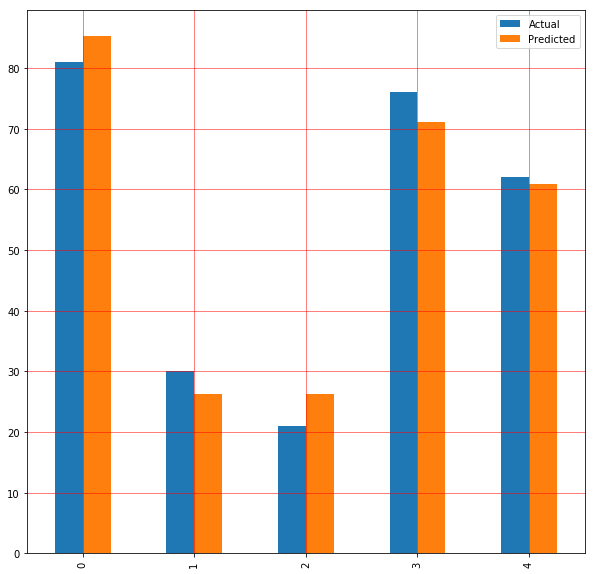

In [23]:
#Plot to show the differences between actual score and predicted score more precisely 

data.plot(kind='bar',figsize=(10,10))
plt.grid(which='major',color='red',linewidth='0.5')
plt.grid(which='minor',color='yellow',linewidth='0.5')
plt.show()

### Time to check the accuracy of this model!!!!

In [24]:
#Accuracy Checking
print('Test Score percentage:', LR.score(x_test, y_test)*100)
print('Training Score percentage:', LR.score(x_train, y_train)*100)

Test Score percentage: 97.07947183958544
Training Score percentage: 94.62159484702728


## This Model is 97.079%(approx.) accurate!!!!

In [25]:
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_y) )

Mean absolute error: 3.865699361578642


In [26]:
print("Mean squared error:",mean_squared_error(y_test,pred_test_y))

Mean squared error: 17.184387695879277


In [27]:
print("R-Squared:", r2_score(y_test, pred_test_y))

R-Squared: 0.9707947183958544


### The value of R-Squared, which indicates the goodness-of-fit, of our model is good for the given dataset

## Now come to the exact question.. 
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [28]:
hrs=float(input("Enter the hours of study:"))

Enter the hours of study:9.25


In [32]:
score_predict = LR.predict([[hrs]])
print("Predicted Score:",score_predict[0]) 

Predicted Score: 95.01922518862449


### End of the Task
## Thank You!!! 